In [1]:
import torch

In [88]:
x = torch.randn((10000,3),requires_grad=True)

In [89]:
def f(x):
    return (x**2).sum()

In [94]:
with torch.no_grad():
    hessian = torch.func.hessian(f)
    laplacian = torch.vmap(lambda x: torch.diag(hessian(x)).sum())

In [95]:
with torch.no_grad():

    grad = torch.func.grad(f)

In [96]:
grad(x).shape

torch.Size([10000, 3])

In [1]:
import sys
import os

project_root = os.path.abspath("..")  # If notebooks is one folder above src
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import torch
from matplotlib import pyplot as plt
from src.eigensolver.galerkin.galerkin_eigensolver import GalerkinSolver
from src.energy.quadratic import QuadraticEnergy
from src.eigensolver.galerkin.kernel_basis import KernelBasis
from src.eigensolver.galerkin.constant_basis import ConstantBasis
from src.eigensolver.galerkin.kernels.gaussian_kernel import GaussianKernel
from src.energy.gaussian_mixture import GaussianMixture
import numpy as np

In [3]:
means = np.array([[0,0],[0,0]])
covs = np.array([[[1,0],[0,1]], [[1,0],[0,1]]])
w = np.array([0.3,0.7])

energy = GaussianMixture(w,means,covs)

In [4]:
energy0 = QuadraticEnergy(np.eye(2))

In [5]:
x = np.random.standard_normal((10000,2))

In [ ]:
energy0.forward(x) - energy.forward(x)

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
       -1.11455983e-16, -1.66533454e-16,  0.00000000e+00], shape=(10000,))

In [8]:
energy0.grad(x) - energy.grad(x)

array([[2.22044605e-16, 1.11022302e-16],
       [1.11022302e-16, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 0.00000000e+00]], shape=(10000, 2))

In [7]:
x = np.array([[0,0],[2,2],[0,-1]])
quadratic_forms = np.einsum('kij,kjj,kij->ik',x[None,:,:]-means[:,None,:],covs,x[None,:,:]-means[:,None,:])

In [5]:
tmin, tmax = [-1,5]
tx = np.linspace(tmin, tmax,100)[:,None]
tmin, tmax = [-1,5]
ty = np.linspace(tmin, tmax,100)[:,None]

tx, ty = np.meshgrid(tx, ty)
# Reshape the grid into an Nx2 array for the function
grid = np.stack([tx.ravel(), ty.ravel()], axis=-1)

In [6]:
f = energy.forward(grid).reshape(tx.shape)

In [7]:
energy.grad(grid)

array([[ 0.00653359,  0.01306702],
       [ 0.00640245,  0.0136308 ],
       [ 0.00623232,  0.01418358],
       ...,
       [-0.08273261, -0.023536  ],
       [-0.08084396, -0.02151493],
       [-0.07830029, -0.01957507]], shape=(10000, 2))

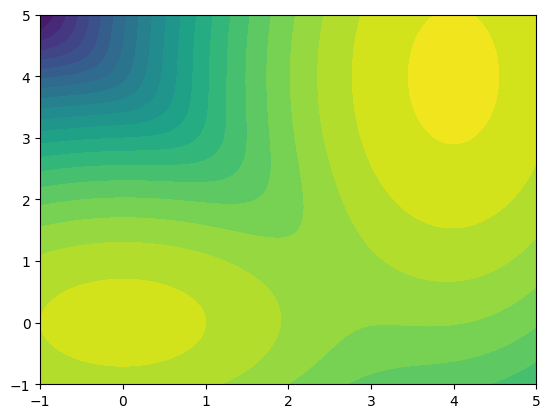

In [8]:
plt.contourf(tx,ty, f, levels = 20)

In [9]:
x = energy.exact_sample((10000,))

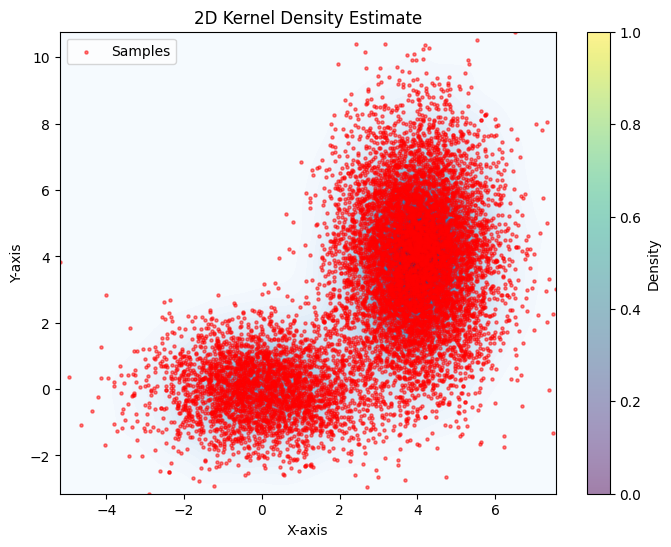

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assume samples is a 2D array of shape (num_samples, 2)
def generate_kde(samples, grid_size=100, bandwidth=None):
    """
    Generate a 2D Kernel Density Estimate (KDE).

    Args:
        samples (array): Input samples, shape (num_samples, 2).
        grid_size (int): Size of the grid for evaluation.
        bandwidth (float or None): Optional bandwidth for KDE. Default uses automatic selection.

    Returns:
        X, Y, Z: Meshgrid (X, Y) and KDE values (Z) on the grid.
    """
    kde = gaussian_kde(samples.T, bw_method=bandwidth)  # KDE object
    
    # Create a grid for evaluation
    x_min, y_min = samples.min(axis=0)
    x_max, y_max = samples.max(axis=0)
    x_grid = np.linspace(x_min, x_max, grid_size)
    y_grid = np.linspace(y_min, y_max, grid_size)
    X, Y = np.meshgrid(x_grid, y_grid)
    
    # Evaluate KDE on the grid
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = kde(positions).reshape(grid_size, grid_size)

    return X, Y, Z

# Example usage with synthetic samples
X, Y, Z = generate_kde(x)

# Plot the KDE
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap="Blues")
plt.scatter(x[:, 0], x[:, 1], s=5, color='red', alpha=0.5, label="Samples")
plt.colorbar(label="Density")
plt.title("2D Kernel Density Estimate")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

In [230]:
torch.manual_seed(42)
energy = QuadraticEnergy(torch.eye(dim))

kernel = GaussianKernel(kernel_params)

basis_points = energy.exact_sample((p,))
basis = KernelBasis(kernel, basis_points)
basis = ConstantBasis(basis)

solver = GalerkinSolver(energy, solver_params)

x = energy.exact_sample((10000,))

In [231]:
solver.fit(x,basis,None)

Orthogonality error: 0.0007212029886431992
L error: 2.0716038606760634e-10


In [232]:
t = torch.linspace(-2,2,10)
grids = [t for i in range(dim)]
grid = torch.cartesian_prod(*grids)

In [233]:
solver.eigvals

tensor([-4.3058e-03,  1.1543e+00,  1.2063e+00,  2.0698e+00,  2.4595e+00,
         2.5151e+00,  3.8686e+00,  4.1600e+00,  4.3689e+00,  4.6134e+00,
         4.9782e+00,  5.7008e+00,  6.2202e+00,  6.7328e+00,  6.8049e+00,
         7.8572e+00,  8.2486e+00,  8.9325e+00,  9.4996e+00,  9.8398e+00,
         1.0356e+01,  1.0812e+01,  1.1228e+01,  1.1736e+01,  1.2251e+01,
         1.2953e+01,  1.3911e+01,  1.4223e+01,  1.5883e+01,  1.6373e+01,
         2.0701e+01])

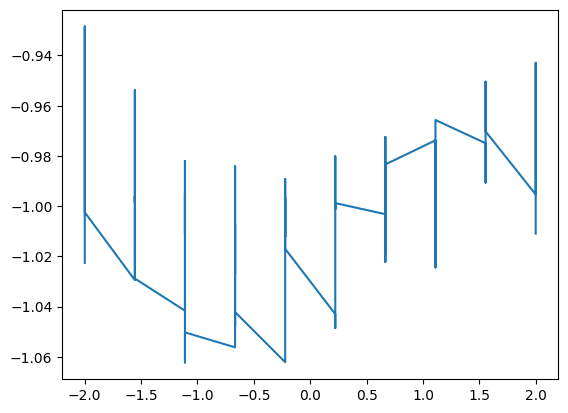

In [234]:
plt.plot(grid[:,0],solver.predict(grid)[:,0])

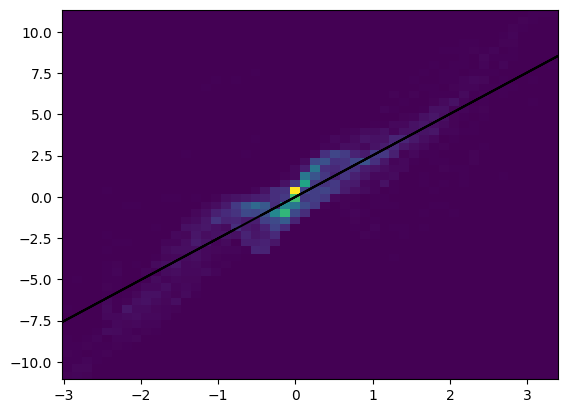

In [263]:
k = 5
plt.hist2d(solver.predict(x)[:,k],solver.predict_Lf(x)[:,k],bins=50,cmap='viridis')
plt.plot(solver.predict(x)[:,k],solver.predict(x)[:,k]*solver.eigvals[k],color='black')

In [52]:
L = solver.compute_L(x,xp)
phi = solver.compute_phi(x,xp)

In [57]:
torch.linalg.eigvals(phi+1e-2*torch.eye(dim))

tensor([ 4.1034e+04+0.0000j,  1.0945e+04+0.0000j,  2.8012e+03+0.0000j,
         6.5249e+02+0.0000j,  1.2814e+02+0.0000j,  2.1291e+01+0.0000j,
         2.9330e+00+0.0000j,  3.3571e-01+0.0000j,  3.2753e-02+0.0000j,
         2.7170e-03+0.0000j, -1.0703e-03+0.0000j,  6.5907e-04+0.0003j,
         6.5907e-04-0.0003j, -3.0745e-04+0.0000j, -2.7343e-04+0.0000j,
         3.7639e-04+0.0000j,  1.8769e-04+0.0002j,  1.8769e-04-0.0002j,
         7.5056e-08+0.0000j,  8.1331e-05+0.0000j])

In [15]:
eigvecs, eigvals = solver.eigvecs, solver.eigvals

In [16]:
grad_k = solver.kernel.grad(xp,x)

# (n, p, p)
first_term = torch.sum(torch.bmm(grad_k, grad_k.transpose(1,2)),dim=0)

# (n, d)
energy_grad = solver.energy.grad(x)

In [24]:
energy_dotprod = torch.bmm(grad_k, energy_grad.unsqueeze(2)).squeeze(2)
k = solver.kernel.forward(x,xp)
second_term = torch.sum(k[:,:,None]*energy_dotprod[:,None,:],dim=0)

In [103]:
second_term.T - second_term

tensor([[   0.0000,   48.8591,   -5.7921,   -9.8925,   -8.2278,  -92.4008,
          -90.1526,   -2.5718,   97.4750,  -23.1839],
        [ -48.8591,    0.0000,  -26.1360,  -27.5527,  -30.9402, -118.8803,
         -127.2057,  -22.7998,   68.0501,  -61.4549],
        [   5.7921,   26.1360,    0.0000,   -2.0998,   -7.1935,  -81.4585,
          -58.0583,    7.4866,   37.9326,  -11.3150],
        [   9.8925,   27.5527,    2.0998,    0.0000,   -1.6142,  -65.7707,
          -51.4215,    7.9088,   47.6292,  -11.2236],
        [   8.2278,   30.9402,    7.1935,    1.6142,    0.0000,  -82.3248,
          -59.4670,   14.3598,   42.1668,  -10.2444],
        [  92.4008,  118.8803,   81.4585,   65.7707,   82.3248,    0.0000,
           10.3239,   84.8817,  128.9948,   57.2728],
        [  90.1526,  127.2057,   58.0583,   51.4215,   59.4670,  -10.3239,
            0.0000,   60.5820,  157.5241,   58.4717],
        [   2.5718,   22.7998,   -7.4866,   -7.9088,  -14.3598,  -84.8817,
          -60.5820,   

In [72]:
L = L + L.T

In [24]:
eigenvals, eigenvecs = torch.linalg.eigh(L)

In [25]:
solver.eigvecs

tensor([[ 4.4577e-01,  3.9845e-02, -1.3722e-01,  5.1583e+00, -5.2840e+00,
          8.6350e-02, -2.1631e-01,  1.1812e+00, -9.6693e-01, -4.0157e-01],
        [-4.8838e-01, -2.5503e+00,  3.5316e-02,  7.3451e+00, -7.9788e+00,
          8.3810e-02,  1.2871e-01,  4.8333e+00, -4.2275e+00,  2.8598e+00],
        [-1.0125e+00, -1.2019e+01, -5.1263e-03, -1.5930e+00,  1.7173e+00,
          5.6623e-01,  6.6992e-02, -6.3777e-01,  5.0182e-01,  1.2409e+01],
        [-1.0275e+00,  3.6578e-02, -2.9494e-02,  1.1613e+00, -1.0789e+00,
         -6.4464e-01,  1.3911e-01, -2.1642e+00,  2.1574e+00,  1.4369e+00],
        [-4.5517e-01,  3.3065e-01, -1.6001e-03, -3.3848e+00,  3.3230e+00,
         -8.0924e-02,  5.9207e-02,  3.4689e+00, -3.4672e+00,  1.8145e-01],
        [ 5.6262e-01,  7.7666e-02,  6.8910e-02, -2.9615e+00,  2.7963e+00,
         -3.3992e-01, -2.3813e-01,  6.7568e-01, -5.1180e-01, -1.2899e-01],
        [-3.0598e-01,  5.2728e-02,  1.4180e-01, -5.4444e+00,  5.2256e+00,
          7.7872e-02,  1.5837e-0

In [27]:
L@eigenvecs[0,:]/eigenvecs[0,:]

tensor([ 7.3680e+02, -7.7096e+03, -4.1425e+00,  5.5353e+02, -1.8538e+03,
         1.2779e+03,  1.2776e+03, -5.7439e+03,  1.2387e+03, -1.4421e+03])

In [75]:
eigenvecs@eigenvecs.T

tensor([[ 1.0000e+00, -1.1921e-07, -2.9802e-08,  0.0000e+00, -6.3330e-08],
        [-1.1921e-07,  1.0000e+00,  5.9605e-08,  8.9407e-08,  2.5332e-07],
        [-2.9802e-08,  5.9605e-08,  1.0000e+00,  0.0000e+00,  3.7253e-08],
        [ 0.0000e+00,  8.9407e-08,  0.0000e+00,  1.0000e+00, -1.1921e-07],
        [-6.3330e-08,  2.5332e-07,  3.7253e-08, -1.1921e-07,  1.0000e+00]])

In [119]:
L - eigenvecs@torch.diag(eigenvals)@eigenvecs.T

tensor([[ 6.1035e-04, -4.8828e-04,  1.5259e-04,  1.8311e-04,  0.0000e+00,
         -2.4414e-04, -2.4414e-04,  1.2207e-04, -3.0518e-04, -1.8311e-04],
        [-3.6621e-04, -8.5449e-04, -1.3733e-04, -1.5259e-05, -3.6621e-04,
         -4.8828e-04, -2.4414e-04,  1.5259e-04, -3.6621e-04, -5.4932e-04],
        [ 1.5259e-04, -1.0681e-04,  0.0000e+00, -3.6621e-04, -3.6621e-04,
         -2.4414e-04, -1.2207e-04, -4.8828e-04,  1.8311e-04,  0.0000e+00],
        [ 2.1362e-04, -4.5776e-05, -3.0518e-04, -4.8828e-04, -3.0518e-04,
         -2.4414e-04, -1.2207e-04, -3.6621e-04,  1.0681e-04, -1.8311e-04],
        [ 0.0000e+00, -3.9673e-04, -3.6621e-04, -3.0518e-04, -4.8828e-04,
         -3.6621e-04, -3.0518e-04, -3.6621e-04,  0.0000e+00, -2.1362e-04],
        [-2.4414e-04, -4.8828e-04, -2.4414e-04, -1.8311e-04, -3.6621e-04,
         -3.6621e-04, -3.6621e-04, -1.8311e-04, -1.8311e-04, -3.6621e-04],
        [-2.4414e-04, -3.6621e-04, -1.2207e-04, -2.4414e-04, -3.0518e-04,
         -3.6621e-04, -2.4414e-0

In [5]:
class Test():
    def __init__(self, name):
        self.name = name
    def __call__(self, text):
        print(text+self.name)

In [6]:
test = Test('Louis')

In [7]:
test('Hello ')

Hello Louis


In [1]:
import numpy as np

In [2]:
x = np.zeros(5)

In [6]:
x[6]

IndexError: index 6 is out of bounds for axis 0 with size 5

In [7]:
def solve_procrustes(A, B):
        """
        Solve the procrustes problem, i.e. finding an orthogonal matrix R that minimizes
        || RA - B ||_F

        Args:
            A (Array)[d,n]
            B (Array)[d,n]
        Returns:
            R (Array)[d,d]
        """
        
        U, S, Vt = np.linalg.svd(A@B.T)
        R = U @ Vt

        return R

In [18]:
x = np.random.random(1000).reshape((1,1000))
y = -np.ones((1,1000))

In [25]:
U = solve_procrustes(x,y)

In [26]:
U

array([[-1.]])

In [22]:
fx = np.zeros([10000,10])

In [24]:
fx[:,1:2]

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], shape=(10000, 1))